##### MLB Attendance Analysis

In [1]:
# Disabling the warnings
import warnings
warnings.filterwarnings('ignore')

##### MLB Attendance improvement

In [2]:
# For this project, we have downloaded and save the data file into our github repository
url = "https://raw.githubusercontent.com/kueyram/DSC630/main/dodgers-2022.csv"

In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# Importing the dataset
dodgers_df = pd.read_csv(url, sep=',')

In [5]:
# Columns of the dataset
dodgers_df.columns

Index(['month', 'day', 'attend', 'day_of_week', 'opponent', 'temp', 'skies',
       'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead'],
      dtype='object')

In [6]:
# Shape of the dataset
dodgers_df.shape

(81, 12)

In [7]:
# Printing 10 random rows from the dataset
dodgers_df.sample(n=10)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
34,JUN,16,45210,Saturday,White Sox,68,Clear,Night,NO,NO,NO,NO
14,MAY,9,33993,Wednesday,Giants,71,Clear,Night,NO,NO,NO,NO
50,JUL,31,52832,Tuesday,Snakes,75,Cloudy,Night,NO,NO,NO,YES
52,AUG,3,43537,Friday,Cubs,73,Clear,Night,NO,NO,YES,NO
40,JUL,2,34493,Monday,Reds,70,Clear,Night,NO,NO,NO,NO
41,JUL,3,33884,Tuesday,Reds,70,Cloudy,Night,YES,NO,NO,NO
57,AUG,8,37084,Wednesday,Rockies,84,Clear,Night,NO,NO,NO,NO
63,AUG,26,41907,Sunday,Marlins,81,Clear,Day,NO,NO,NO,NO
46,JUL,16,32238,Monday,Phillies,67,Clear,Night,NO,NO,NO,NO
68,SEP,3,33540,Monday,Padres,84,Cloudy,Night,NO,NO,NO,NO


##### Exploratory Data Analysis

In [8]:
# Checking for missing values
dodgers_df.isnull().sum()

month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

This shows that there is no missing values in the dataset

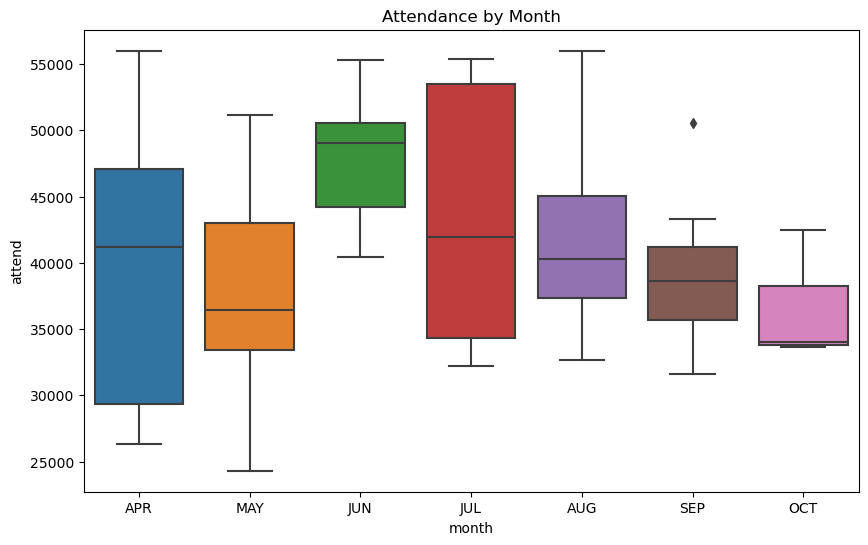

In [9]:
# Attendance by month
# Plot attendance by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='attend', data=dodgers_df)
plt.title('Attendance by Month')
plt.show()

##### Analysis
The box plot shows that attendance peaks in June and July with around 50,000 fans, while May, September, and October have fewer fans, around 30,000 to 40,000. April has a lot of ups and downs in attendance, with numbers ranging from 25,000 to 55,000. 

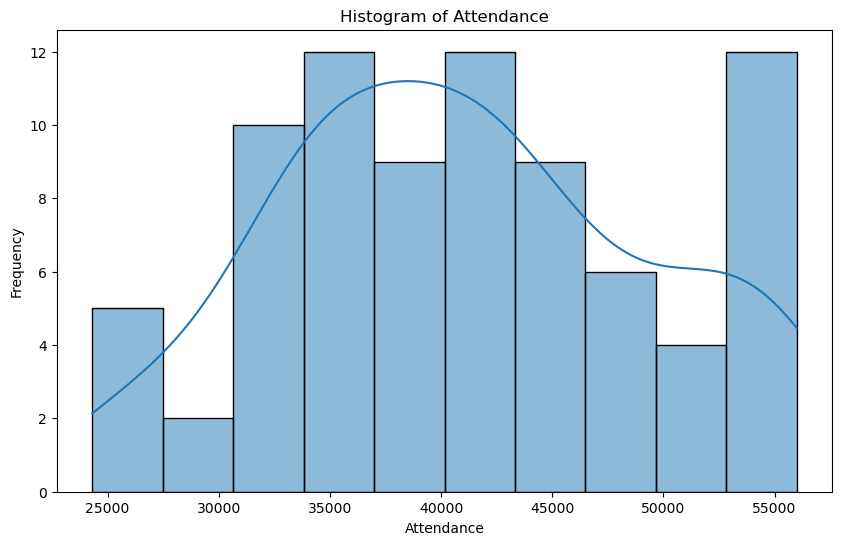

In [27]:
# Histogram of attendance
plt.figure(figsize=(10, 6))
sns.histplot(dodgers_df['attend'], bins=10, kde=True)
plt.title('Histogram of Attendance')
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.show()

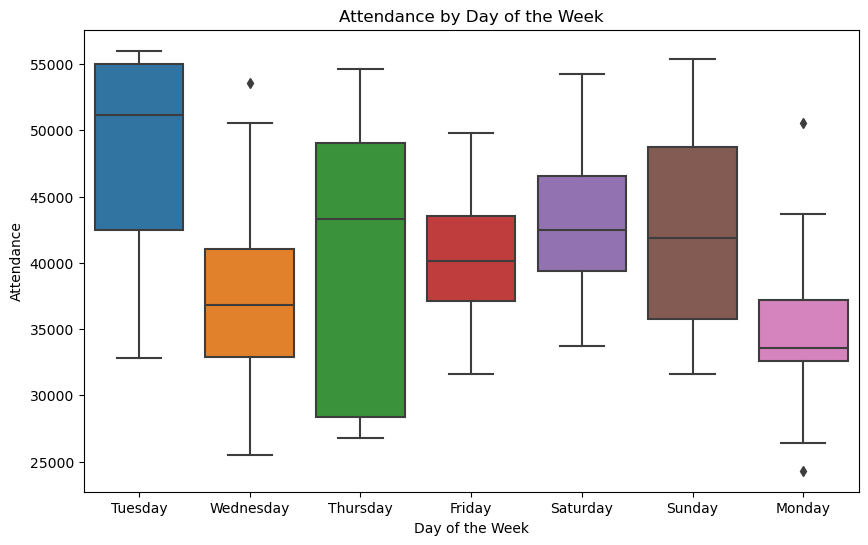

In [11]:
# Attendance by the day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='attend', data=dodgers_df)
plt.title('Attendance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Attendance')
plt.show()

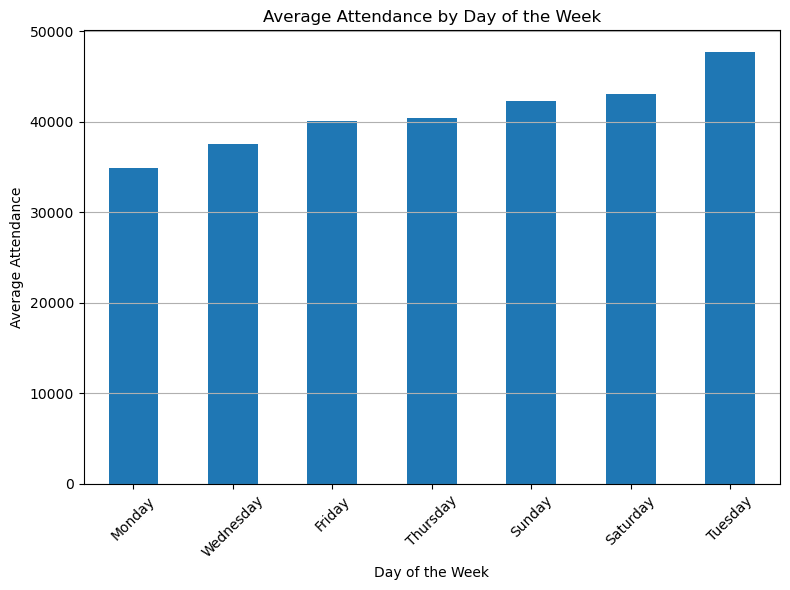

In [30]:
# Average attendance by day of the week
# Calculating average attendance by day of the week
avg_attendance_by_day = dodgers_df.groupby('day_of_week')['attend'].mean().sort_values()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
avg_attendance_by_day.plot(kind='bar')
plt.title('Average Attendance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

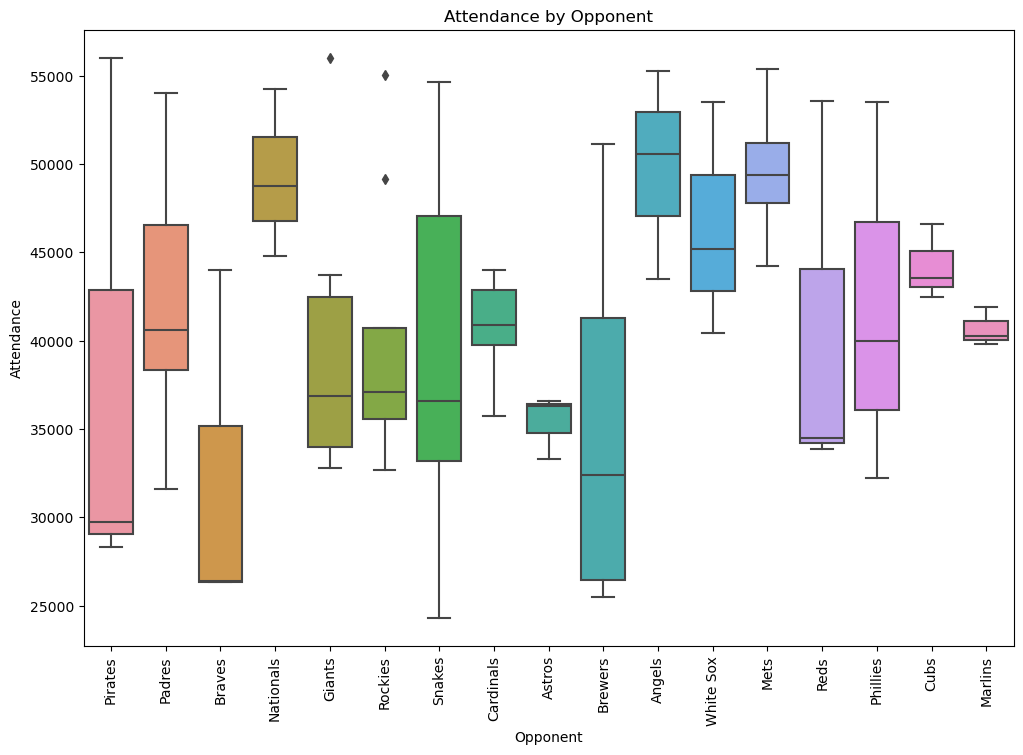

In [32]:
# Attendance by opponent
plt.figure(figsize=(12, 8))
sns.boxplot(x='opponent', y='attend', data=dodgers_df)
plt.title('Attendance by Opponent')
plt.xlabel('Opponent')
plt.ylabel('Attendance')
plt.xticks(rotation=90)
plt.show()

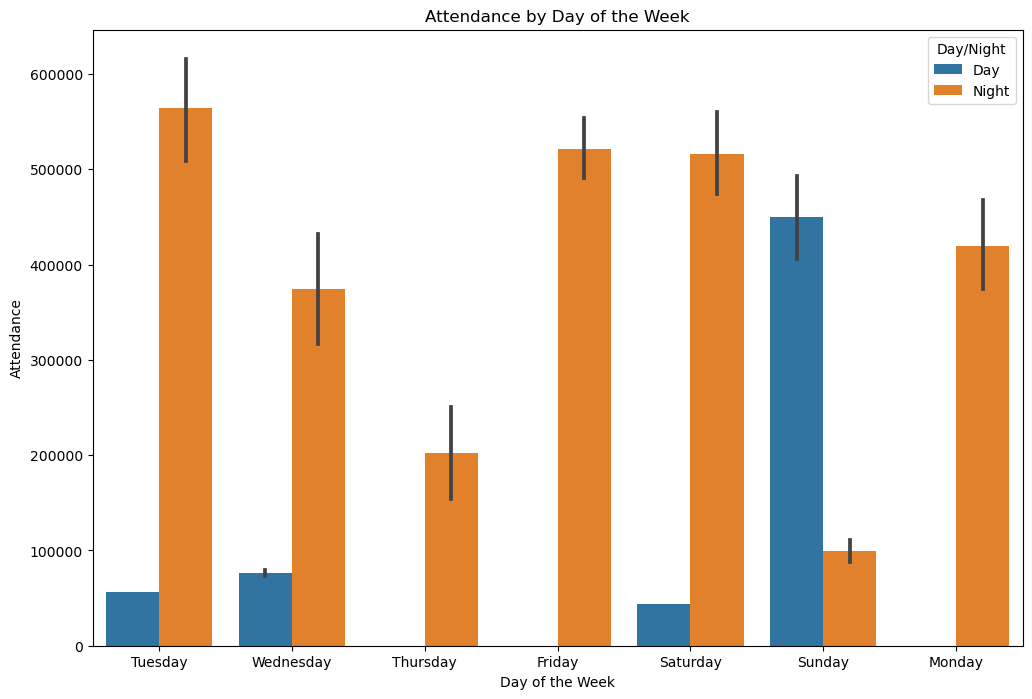

In [14]:
# Attendance distribution by day of the week
plt.figure(figsize=(12, 8))
sns.barplot(data=dodgers_df, x='day_of_week', y='attend', hue='day_night', estimator=sum)
plt.title("Attendance by Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('Attendance')
plt.legend(title='Day/Night')
plt.show()

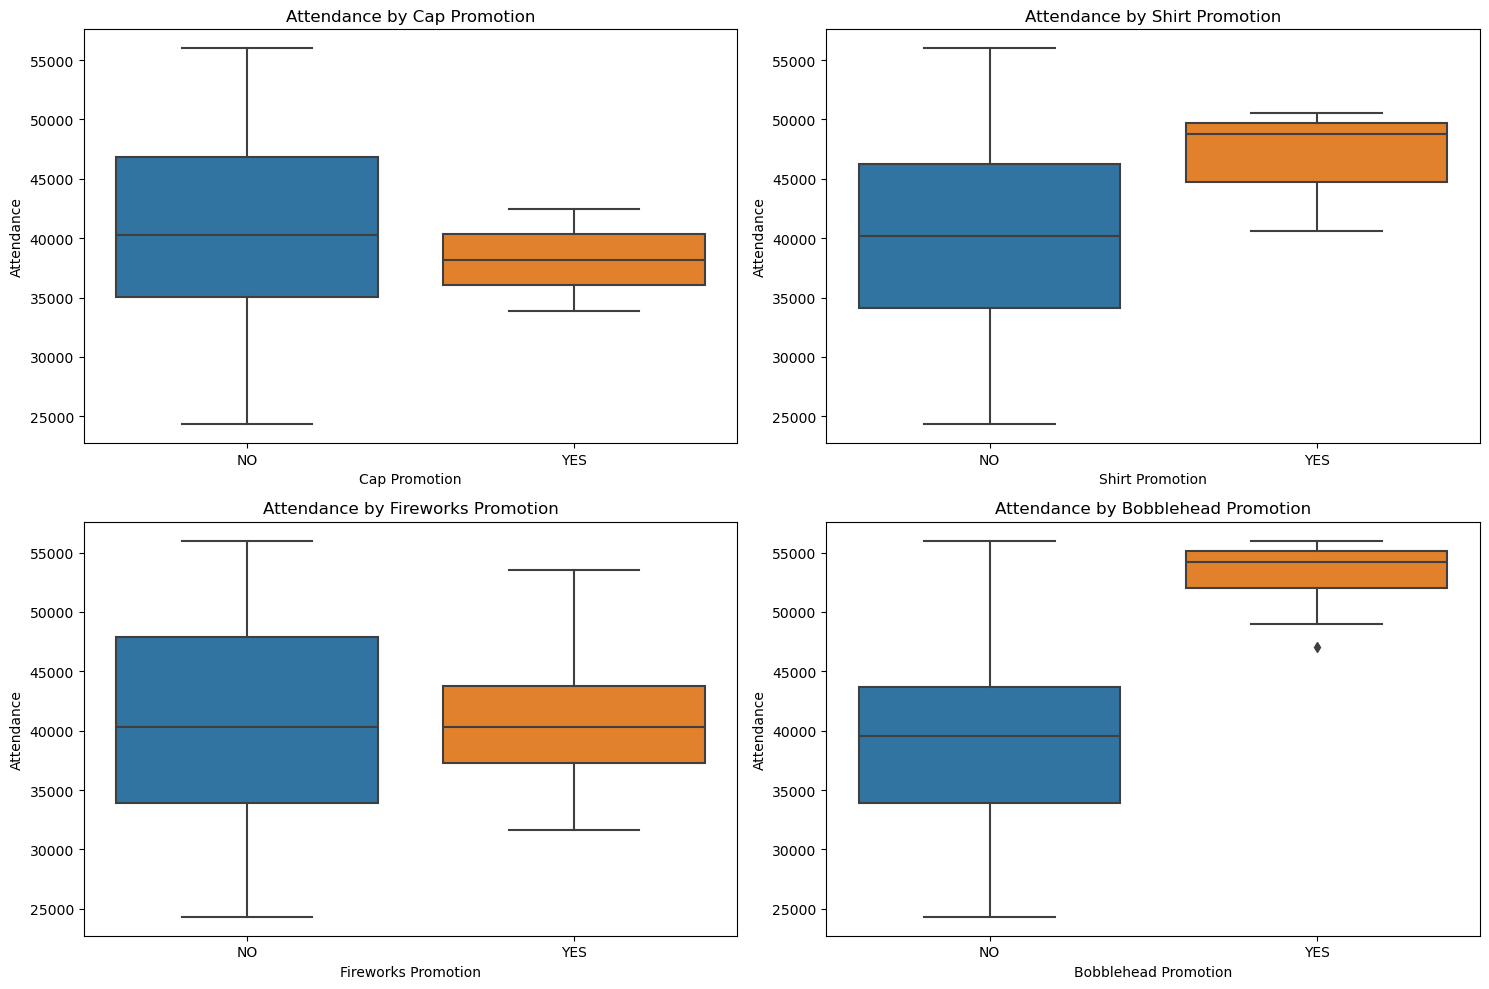

In [33]:
# Attendance by event


# Promotional event
promo_cols = ['cap', 'shirt', 'fireworks', 'bobblehead']

# Creating a 2x2 grid for plots
plt.figure(figsize=(15, 10))

# Attendance for cap promotion
plt.subplot(2, 2, 1)
sns.boxplot(x='cap', y='attend', data=dodgers_df)
plt.title('Attendance by Cap Promotion')
plt.xlabel('Cap Promotion')
plt.ylabel('Attendance')

# Attendance for shirt promotion
plt.subplot(2, 2, 2)
sns.boxplot(x='shirt', y='attend', data=dodgers_df)
plt.title('Attendance by Shirt Promotion')
plt.xlabel('Shirt Promotion')
plt.ylabel('Attendance')

# Attendance for fireworks promotion
plt.subplot(2, 2, 3)
sns.boxplot(x='fireworks', y='attend', data=dodgers_df)
plt.title('Attendance by Fireworks Promotion')
plt.xlabel('Fireworks Promotion')
plt.ylabel('Attendance')

# Attendance for bobblehead promotion
plt.subplot(2, 2, 4)
sns.boxplot(x='bobblehead', y='attend', data=dodgers_df)
plt.title('Attendance by Bobblehead Promotion')
plt.xlabel('Bobblehead Promotion')
plt.ylabel('Attendance')

# Displaying the plots
plt.tight_layout()
plt.show()



##### Correlation Analysis

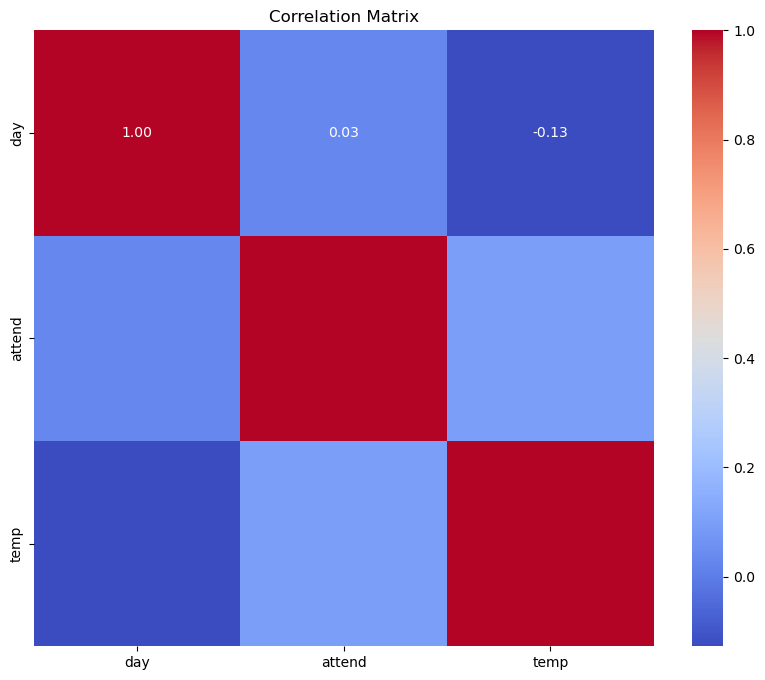

In [16]:
# Selecting only the numerical columns for the correlation analysis
numeric_columns = dodgers_df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Correlation coefficient between attendance and the day of the month: 0.027092977479971102


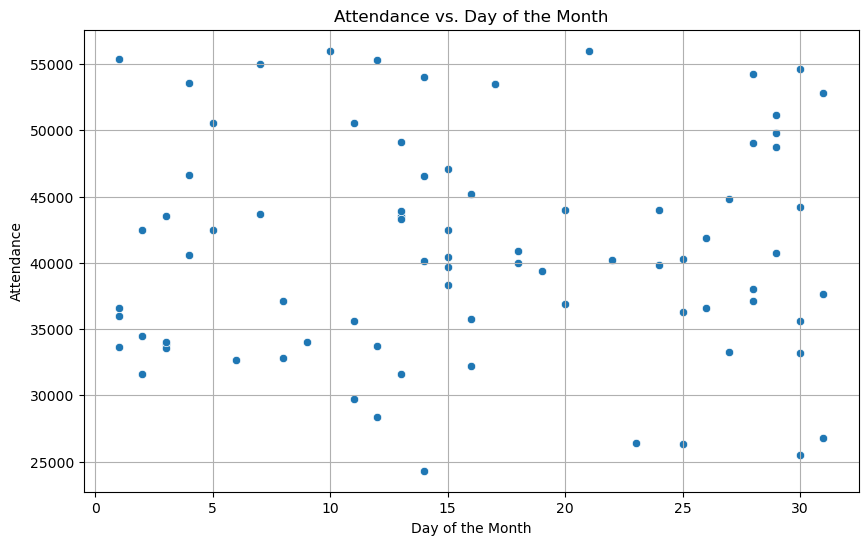

In [17]:
# Correlation coefficient between attendance and day of the month
correlation1 = dodgers_df['attend'].corr(dodgers_df['day'])
print("Correlation coefficient between attendance and the day of the month:", correlation1)

# Scatter plot of the attendance vs day of the month
plt.figure(figsize=(10, 6))

sns.scatterplot(data=dodgers_df, x='day', y='attend')

# Adding a title and labels to the plot
plt.title("Attendance vs. Day of the Month")
plt.xlabel('Day of the Month')
plt.ylabel('Attendance')

# Displaying the plot
plt.grid(True)
plt.show()

Correlation coefficient between attendance and temperature: 0.09895073090623711


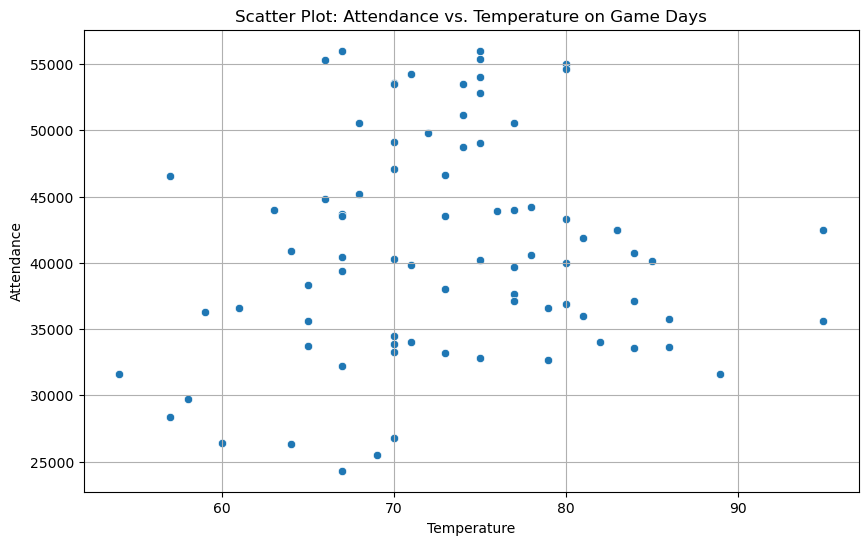

In [18]:
# Correlation coefficient between attendance and temperature
correlation2 = dodgers_df['attend'].corr(dodgers_df['temp'])
print("Correlation coefficient between attendance and temperature:", correlation2)

# Scatter plot of the attendance vs temperature
plt.figure(figsize=(10, 6))

sns.scatterplot(data=dodgers_df, x='temp', y='attend')

# Adding a title and labels to the plot
plt.xlabel('Temperature')
plt.ylabel('Attendance')
plt.title('Scatter Plot: Attendance vs. Temperature on Game Days')
plt.grid(True)

# Displaying the plot
plt.show()

In [19]:
# Selecting features
features = dodgers_df[['month', 'day', 'day_of_week','day_night', 'cap', 'shirt', 'fireworks', 'bobblehead']]

# Target variable
target = dodgers_df['attend']

# Enconding the features
features_encoded = pd.get_dummies(features)

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(features_scaled, target)

# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ -569.14951145  -459.73384472   713.54801516   400.28869755
  1717.79442907 -1265.19229135  -316.83755014  -591.37157396
 -4544.48855063  -728.38465757  1819.71308257  1529.16078783
   -98.2862471   2230.76124863  -274.61027959   285.32807407
  -285.32807407   490.84236373  -490.84236373  -570.87908678
   570.87908678 -3032.1929361   3032.1929361  -1926.58422216
  1926.58422216]
Intercept: 41040.07407407407


In [20]:
# Splitting the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features_encoded, target, test_size=0.2, random_state=0)

# Initializing the linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(features_train, target_train)

# Making predictions on the test data
target_pred = model.predict(features_test)

# Calculating the mean absolute error
mae = mean_absolute_error(target_test, target_pred)

# Calculating the mean squared error
mse = mean_squared_error(target_test, target_pred)

# Calculating the R-squared
r_squared = r2_score(target_test, target_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Absolute Error: 5420.265128800637
Mean Squared Error: 42422894.94079948
R-squared: 0.18321422285146927


##### Conclusion
Our analysis on the games shows that there is a higher attendance on Tuesdays. June and July are the months with the highers attendance. These suggests that these months attracts more fans, possibly due to the summer with better weather.
To increase attendance, management can plan more promotions during slower months like May, September, and October, and capitalize on the busier times in June and July with special offers.